# Predicting Hand-written digit values using 3-layered neural network

In this project, we train a model which predicts the values of hand-drawn numbers and prints the predicted value. The model is trained and tested using the MNIST dataset of hand-drawn digits.

## Importing the required libraries

In [167]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

## Loading the mnist dataset from local folder

We load the mnist csv data stored in a local folder and split it into the training sets and test sets.

In [168]:
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

In [169]:
xtrain = train.drop(["label"],axis = 1)
xtest = test.drop(["label"],axis = 1)
ytrain = train["label"]
ytest = test["label"]
np.shape(xtrain)

(60000, 784)

In [170]:
np.shape(xtrain)

(60000, 784)

## Normalizing the data

We now normalize the training and test set data so that it becomes easier for the model to train the data. We use the inbuilt function in keras to do the normaization.

In [171]:
xtrain = tf.keras.utils.normalize(xtrain,axis = 1)
xtest = tf.keras.utils.normalize(xtest,axis = 1)

## Setting up the neural network model

The neural network of the model used is composed of 3 layers with one hidden layer. The input and hidden layers are both of the same size and each unit of a layer connects each unit of the next layer. The output layer has 10 units corresponsing to the 10 digits we need to predict.

In [180]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

We now fit the model to the training set and save it.

In [181]:
model.fit(xtrain,ytrain, epochs = 3)
model.save('Handwritten_digits_recognition.model')

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2735 - accuracy: 0.9186
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1064 - accuracy: 0.9674
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0706 - accuracy: 0.9776
INFO:tensorflow:Assets written to: Handwritten_digits_recognition.model\assets


## Loading the model and finding the accuracy and loss

We now load the model and evaluate it. First we predict values with the test set and find the acuuracy and loss. 

In [182]:
trainedmodel = tf.keras.models.load_model('Handwritten_digits_recognition.model')


In [183]:
loss,accuracy = model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9771


##  Predicting the digits of hand-drawn images using MS paint

Now, we import a few hand drawn images in MS paint of the same pixel count as that of the training set (28 x 28) and run the model to predict the values.

1/1 [==============================] - 0s 16ms/step
The digit is {2}


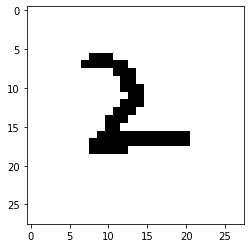

In [198]:
img1 = cv2.imread(f"digit2.png")[:,:,0]
img1 = np.invert(np.array([img1]))
img = np.reshape(img1,(1,784))
prediction = model.predict(img)
print("The digit is", {np.argmax(prediction)})
plt.imshow(img1[0],cmap = plt.cm.binary)
plt.show()

1/1 [==============================] - 0s 31ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
The digit is 6


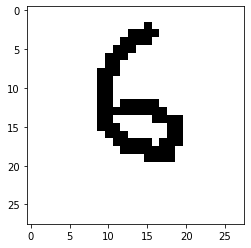

In [199]:
img1 = cv2.imread(f"digit4org.png")[:,:,0]
img1 = np.invert(np.array([img1]))
img = np.reshape(img1,(1,784))
prediction1 = model.predict(img)
print(prediction1)
print("The digit is", np.argmax(prediction1))
plt.imshow(img1[0],cmap = plt.cm.binary)
plt.show()

1/1 [==============================] - 0s 42ms/step
The digit is 5


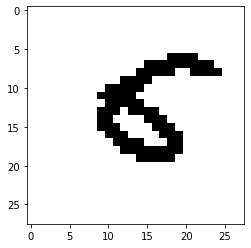

In [200]:
img1 = cv2.imread(f"digit4.png")[:,:,0]
img1 = np.invert(np.array([img1]))
img = np.reshape(img1,(1,784))
prediction = model.predict(img)
print("The digit is", np.argmax(prediction))
plt.imshow(img1[0],cmap = plt.cm.binary)
plt.show()

From the above case, we can see that our model is unable to predict digits when there are slight modifications such as a small rotation of the image. In the above test, the digit 6 has been rotated by a small angle and this caused the model to not predict the digit accurately. Therefore, a solution for this is that we can take each image in the training set and rotate them by different angles in order to train the computer to predict those images.
